# Density Models
It's time to finish this practice by learning DBSCAN. We will use the same set of data from the other notebooks.

In [1]:
# Import Libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate Clusters
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

In [3]:
#create plotting function
def plot_clusters(x, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
        if plt_cluster_centers:
            plt.scatter(X_centroids,
                        Y_centroids,
                        marker='*',
                        c='red',
                        s='250',
                        label='centroids')
            
        plt.legend()
        plt.grid()
        plt.show()

## DBSCAN
Let's import the necessary libraries:

In [4]:
# Import make_moons from sklearn
from sklearn.datasets import make_moons

# Import DBSCAN
from sklearn.cluster import DBSCAN

Now, we create an instance of the DBSCAN class:

In [5]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

We created the instance of **DBSCAN** class with a few parameters we didn't use before:
<br>
* **eps**: The maximum distance between two samples for one to be considered as being in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. It is the most important DBSCAN parameter to choose appropriately for our dataset and distance function.
<br>
<br>
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.
<br>
<br> Now it's time to fit the data:

In [6]:
# Fit and predict
y_db = db.fit_predict(X)

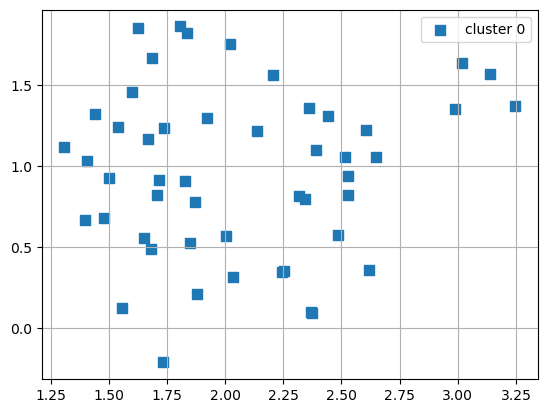

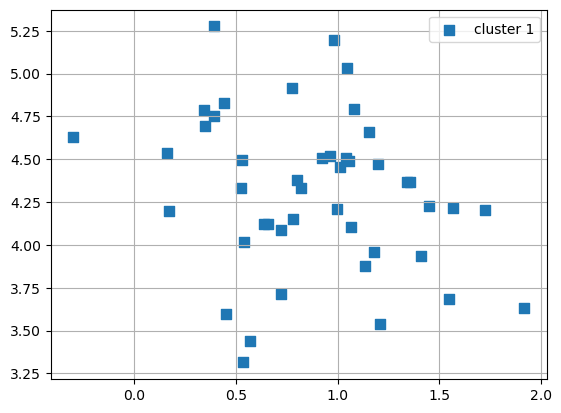

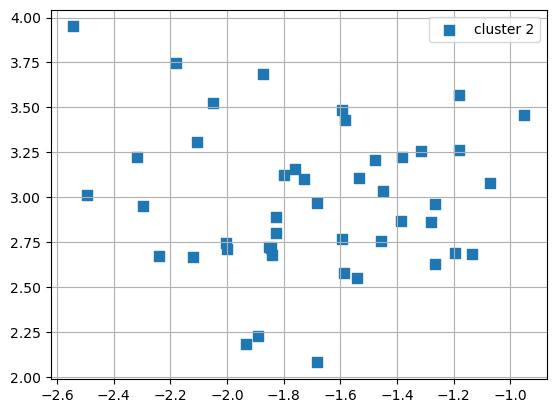

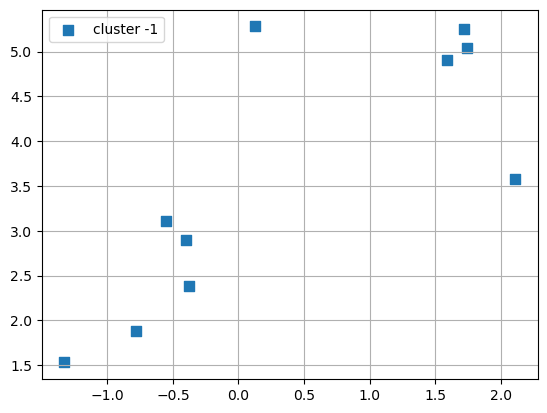

In [7]:
# Plot DBSCAN clusters
plot_clusters(X, y_db)

From the plot above, we can see how the **DBSCAN** algorithm assigned clusters to the data-points. The difference from the algorithms used in the previous sections is that **DBSCAN** also created a separate cluster for outliers. In the plot, the outliers are displayed as red squares.
<br>
## Non-Spherical Data
In all the previous examples, we used spherical-shape data in which all of the algorithms (**k-means, Agglomerative clustering, and DBSCAN**) performed almost identically well. But what happens when we try moon-shaped data?

In [8]:
# Generate moon-shaped data
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

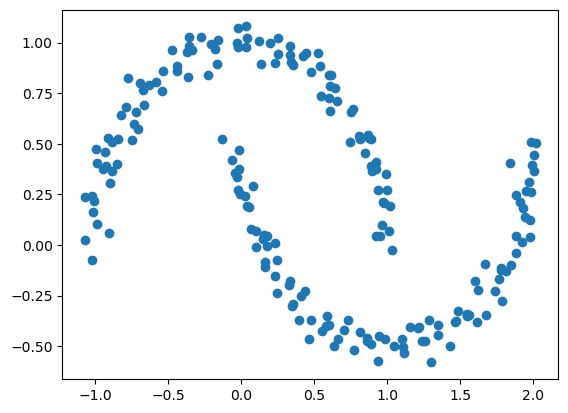

In [9]:
# Plot the data
plt.scatter(X[:,0], X[:,1])
plt.show()

From the plot, we can see that the data looks like two separate clusters, each of them moon-shaped.

But how will k-means perform on data like this?

ValueError: s must be a scalar, or float array-like with the same size as x and y

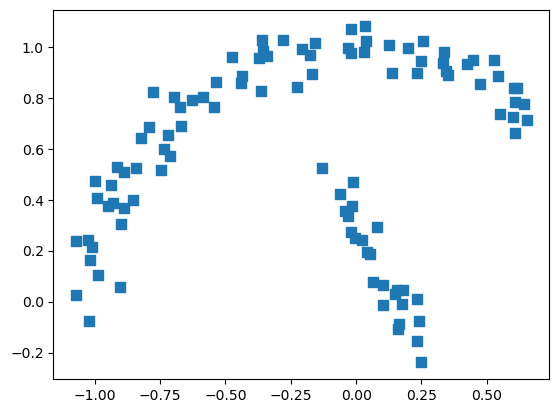

In [12]:
# Import K-means
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2, #How many clusters we expect
            n_init=10,
            random_state=0)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X, y_km, plt_cluster_centers=True)

From the plot above, we can see that the result is not what we expected. The data is not separated into clusters well.
<br>
<br> Lets try Agglomerative clustering

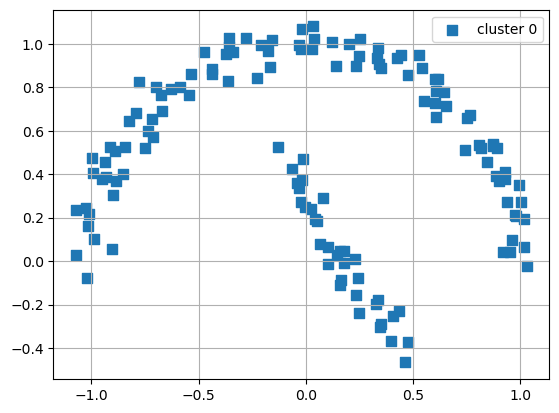

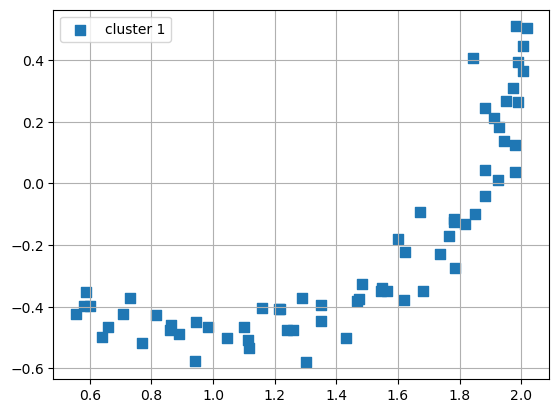

In [13]:
# Import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# fit Agglomerative clustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

y_hc = ac.fit_predict(X)

#Plot HC clusters
plot_clusters(X, y_hc)

The result is just as bad as with the *k-means* algorithm. In both cases, it is not our fault. We set the parameters correctly and did our best to get good results. It's nice to remember that **none of the clustering algorithms mentioned above can deal with non-spherical clusters.**
<br>
<br> This is where **DBSCAN** comes in

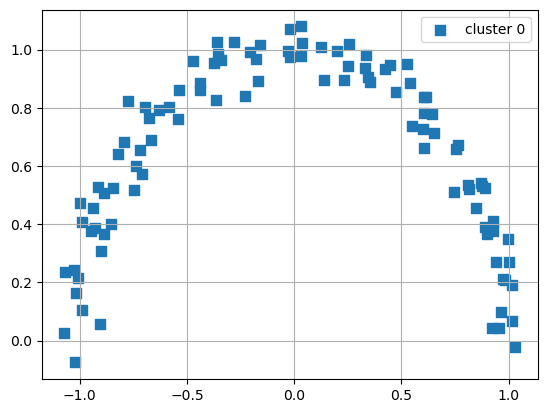

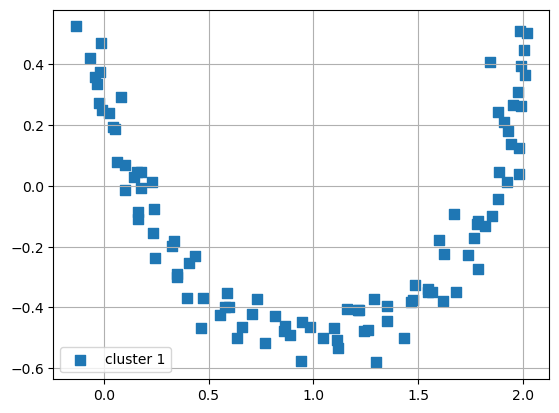

In [14]:
# fit DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X, y_db)

## Conclusion 
In this walkthrough, we have seen where it makes sense to use density models instead of more traditional, distance and hierarchical models. However, **DBSCAN** is not the best for sparse points that are still part of a cluster because they will be treated as outliers. We need to be careful about this when using density models in the future.